In [27]:
import pandas as pd
from nltk import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv("spam_ap24.csv")
data.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
print(data.isnull().sum())

Category    0
Message     0
dtype: int64


In [8]:
print(data.duplicated().sum())
data.drop_duplicates(keep="first",inplace = True)

415


In [9]:
print(data.duplicated().sum())

0


In [11]:
data["Category"].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

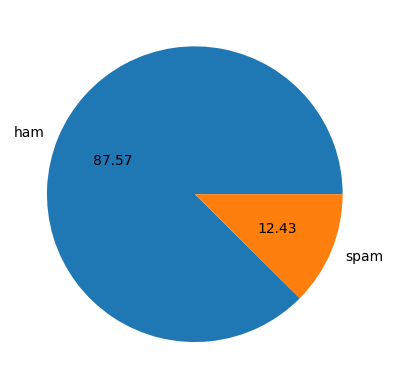

In [15]:
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:

def clean_Message(txt):
    txt = txt.lower()
    txt = word_tokenize(txt)
    txt = [t for t in txt if t not in stopwords.words("english")]
    txt = [t for t in txt if t not in punctuation]
    txt = (" ").join(txt)
    return txt

data["clean_Message"] = data["Message"].apply(clean_Message)
data.head(3)

,Category,Message,clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...
1,ham,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...


In [ ]:
# data.rename(columns={'Category':'target','Message' :'text'},inplace = True)

In [23]:
cv = CountVectorizer()
vectors = cv.fit_transform(data["clean_Message"])
features = pd.DataFrame(vectors.toarray(),columns=cv.get_feature_names_out())
print(features)
target = data["Category"]

      00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0      0    0       0             0     0     0            0            0   
1      0    0       0             0     0     0            0            0   
2      0    0       0             0     0     0            0            0   
3      0    0       0             0     0     0            0            0   
4      0    0       0             0     0     0            0            0   
...   ..  ...     ...           ...   ...   ...          ...          ...   
5152   0    0       0             0     0     0            0            0   
5153   0    0       0             0     0     0            0            0   
5154   0    0       0             0     0     0            0            0   
5155   0    0       0             0     0     0            0            0   
5156   0    0       0             0     0     0            0            0   

      0125698789  02  ...  zhong  zindgi  zoe  zogtorius  zoom  zouk  zyada

In [24]:
x_train , x_test , y_train, y_test = train_test_split(features.values,target)

In [30]:
model = MultinomialNB()
model.fit(x_test,y_test)
cr = classification_report(y_test,model.predict(x_test))
print(cr)
s1 = accuracy_score(y_train,model.predict(x_train))
s2 = accuracy_score(y_test,model.predict(x_test))
print("s1 training score = ",s1)
print("s2 testing score  = ",s2)

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1113
        spam       0.99      0.99      0.99       177

    accuracy                           1.00      1290
   macro avg       0.99      1.00      1.00      1290
weighted avg       1.00      1.00      1.00      1290

s1 training score =  0.978536333074735
s2 testing score  =  0.9976744186046511


In [31]:
model = BernoulliNB()
model.fit(x_test,y_test)
cr = classification_report(y_test,model.predict(x_test))
print(cr)
s1 = accuracy_score(y_train,model.predict(x_train))
s2 = accuracy_score(y_test,model.predict(x_test))
print("s1 training score = ",s1)
print("s2 testing score  = ",s2)

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1113
        spam       1.00      0.29      0.45       177

    accuracy                           0.90      1290
   macro avg       0.95      0.65      0.70      1290
weighted avg       0.91      0.90      0.88      1290

s1 training score =  0.9022498060512025
s2 testing score  =  0.9031007751937985


In [32]:
model = GaussianNB()
model.fit(x_test,y_test)
cr = classification_report(y_test,model.predict(x_test))
print(cr)
s1 = accuracy_score(y_train,model.predict(x_train))
s2 = accuracy_score(y_test,model.predict(x_test))
print("s1 training score = ",s1)
print("s2 testing score  = ",s2)

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1113
        spam       0.83      1.00      0.91       177

    accuracy                           0.97      1290
   macro avg       0.91      0.98      0.94      1290
weighted avg       0.98      0.97      0.97      1290

s1 training score =  0.8975950349107835
s2 testing score  =  0.9713178294573643


In [33]:
from pickle import *

In [10]:
f = open("vector.pkl","wb")
dump(cv,f)
f.close()

In [11]:
f = open("model.pkl","wb")
dump(model,f)
f.close()

In [12]:
f= open("model.pkl","rb")
model = load(f)
f.close()


In [13]:
f = open("vector.pkl","rb")
cv = load(f)
f.close()
